# 경사하강법 (Gradient Descent)

(본 실습 파일은 'PyTorch를 활용한 딥러닝 실습(이경록, 2024)'에 기반하여 작성되었습니다. Thanks to Teddylee!)

--

경사하강법 기본 개념 ==> 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 더이상 값이 변하지 않을 때까지 반복하는 것!

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

## 샘플에 활용할 데이터 셋 만들기

In [4]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

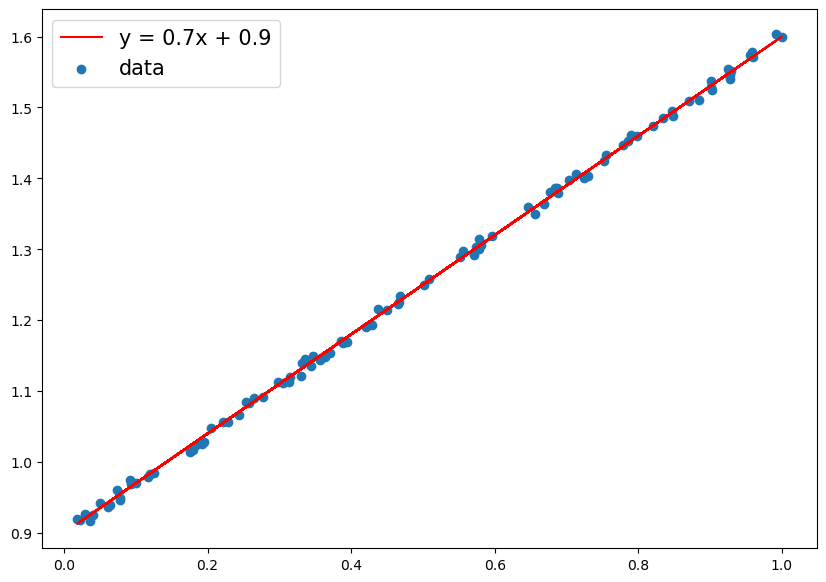

w: 0.7, b: 0.9


In [28]:
x, y = make_linear(w=0.7, b=0.9, size=100, noise=0.01)

In [29]:
x

array([0.42004446, 0.01833915, 0.57079025, 0.26477919, 0.55180441,
       0.04111528, 0.64677362, 0.71304241, 0.33045914, 0.22223643,
       0.57842626, 0.43731384, 0.35643   , 0.06441549, 0.67735465,
       0.3155592 , 0.66880371, 0.11659979, 0.75457722, 0.07458786,
       0.92868388, 0.07759364, 0.9264566 , 0.58052123, 0.5021087 ,
       0.19535319, 0.79789334, 0.95934372, 0.38814886, 0.25721624,
       0.65576684, 0.77870835, 0.95527259, 0.3641013 , 0.55573339,
       0.68347325, 0.99958725, 0.88435322, 0.92546417, 0.90164267,
       0.83415945, 0.09188793, 0.02870266, 0.78619083, 0.44942875,
       0.09316669, 0.46611447, 0.90205463, 0.57875661, 0.75289584,
       0.17492375, 0.19251291, 0.46495915, 0.90106359, 0.27677909,
       0.84638209, 0.03639318, 0.72925144, 0.05056565, 0.42883313,
       0.25393996, 0.30509661, 0.2289051 , 0.70303388, 0.68702977,
       0.38632528, 0.87011204, 0.78987462, 0.46856941, 0.50910317,
       0.09974034, 0.24358316, 0.81977275, 0.59648973, 0.20553

In [30]:
y

array([1.18980883, 0.92018606, 1.29218444, 1.09072579, 1.28903638,
       0.92572007, 1.35983757, 1.40596396, 1.12168627, 1.0564829 ,
       1.31421484, 1.21559705, 1.14324515, 0.93878962, 1.38066752,
       1.12040609, 1.36381726, 0.97926067, 1.43236215, 0.9597873 ,
       1.55104991, 0.94592502, 1.54625327, 1.30636048, 1.25018407,
       1.0280838 , 1.46014188, 1.57094842, 1.16781317, 1.08359926,
       1.35004418, 1.44775126, 1.57368488, 1.14806982, 1.29694242,
       1.38576232, 1.59964026, 1.51031218, 1.55452947, 1.5286819 ,
       1.48559778, 0.9740541 , 0.92629318, 1.45296227, 1.21447497,
       0.96916055, 1.22588216, 1.52419189, 1.30062702, 1.42418459,
       1.01377026, 1.02594897, 1.22298157, 1.53735609, 1.09096906,
       1.49543858, 0.9174038 , 1.4038065 , 0.94249109, 1.19300071,
       1.08436461, 1.11112445, 1.05675299, 1.39738134, 1.38397778,
       1.17052737, 1.5094143 , 1.46052671, 1.23403456, 1.25788224,
       0.97093755, 1.06581259, 1.47426656, 1.31933848, 1.04800

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정

In [38]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

In [39]:
w, b

(0.38303600473070787, 0.35305397020790075)

`y_hat`은 `prediction`의 결과(값) --> 즉, 가설함수에서 실제 값(y)를 뺀 함수를 정의

In [15]:
# 가설함수 정의하기
y_hat = w * x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function 정의

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱의 평균**으로 정의

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표

In [16]:
# Loss Function 정의 - MSE
error = ((y_hat - y) ** 2).mean()

## 학습률 (Learning Rate)

In [17]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png', width=700)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [25]:
# 최대 반복 횟수
num_epoch = 500

# 학습율 (learning_rate)
learning_rate = 0.1

In [40]:
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 가설 함수 설정
    y_hat = w * x + b

    # Loss Function - MSE 정의
    error = ((y_hat - y) ** 2).mean()
    
    # 손실이 0.00005 보다 작으면 break
    if error < 0.00005:
        break

    # 경사하강법 계산 및 적용
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()

    # errors(loss) 추가
    errors.append(error)

    if epoch % 5 == 0:
        print("Epoch {0:2} w = {1:.5f}, b = {2:.5f}, error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("Epoch {0:2} w = {1:.1f}, b = {2:.1f}, error = {3:.5f}".format(epoch, w, b, error))

Epoch  0 w = 0.97587, b = 0.86795, error = 0.02081
Epoch  5 w = 0.94563, b = 0.82921, error = 0.00864
Epoch 10 w = 0.92655, b = 0.81122, error = 0.00523
Epoch 15 w = 0.91331, b = 0.80382, error = 0.00413
Epoch 20 w = 0.90319, b = 0.80176, error = 0.00365
Epoch 25 w = 0.89478, b = 0.80239, error = 0.00336
Epoch 30 w = 0.88736, b = 0.80433, error = 0.00311
Epoch 35 w = 0.88056, b = 0.80689, error = 0.00290
Epoch 40 w = 0.87417, b = 0.80971, error = 0.00270
Epoch 45 w = 0.86810, b = 0.81261, error = 0.00252
Epoch 50 w = 0.86229, b = 0.81550, error = 0.00235
Epoch 55 w = 0.85671, b = 0.81834, error = 0.00219
Epoch 60 w = 0.85133, b = 0.82111, error = 0.00204
Epoch 65 w = 0.84615, b = 0.82379, error = 0.00191
Epoch 70 w = 0.84115, b = 0.82638, error = 0.00178
Epoch 75 w = 0.83633, b = 0.82889, error = 0.00166
Epoch 80 w = 0.83168, b = 0.83131, error = 0.00155
Epoch 85 w = 0.82719, b = 0.83365, error = 0.00144
Epoch 90 w = 0.82285, b = 0.83591, error = 0.00135
Epoch 95 w = 0.81867, b = 0.838

**시각화**

학습 진행(epoch)에 따른 오차를 시각화

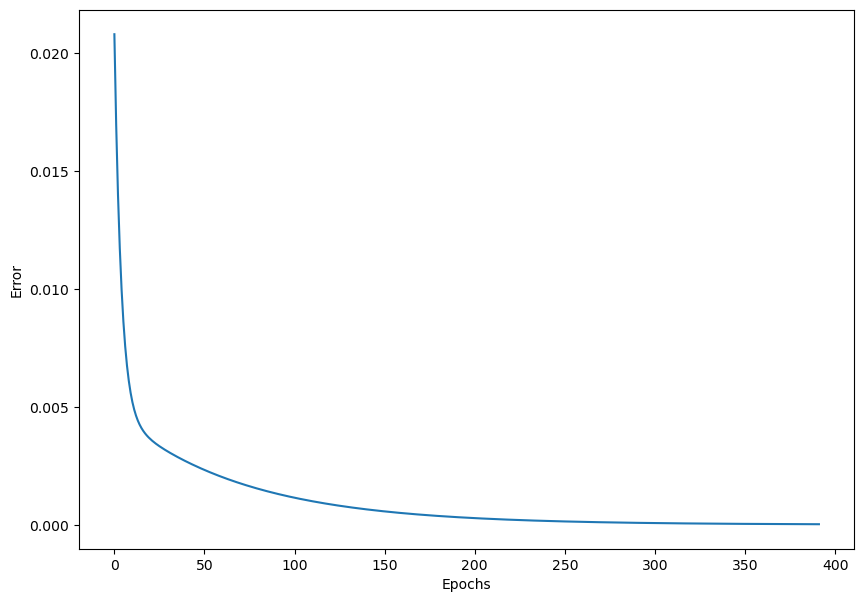

In [41]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# 추가적인 내용 for advanced users

In [33]:
# Batch Gradient Descent vs Stochastic Gradient Descent**
Image(url='https://editor.analyticsvidhya.com/uploads/58182variations_comparison.png')

In [34]:
Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*9A0u4eeU_75bPgEuEwnwVQ.png')